# Regularization

In [1]:
using LinearAlgebra, Distributions, Random, Optim, Plots

In [2]:
# Make some artificial data
Random.seed!(1)
a = 5; b = 10 # Unknown parameters
xdist = Normal(a,2)
ydist = Normal(b-a,1)
N = 1000

x = rand(xdist,N)
y = x + rand(ydist,N);

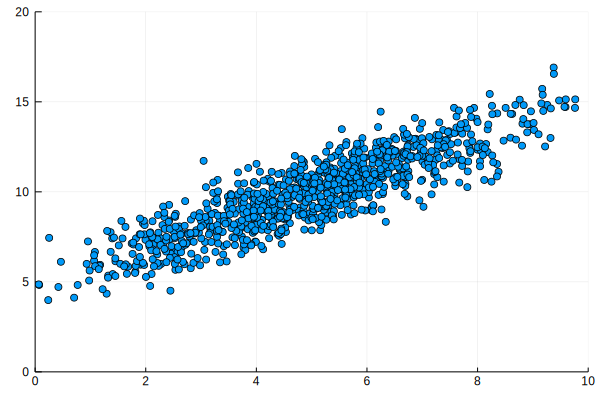

In [3]:
scatter(x,y, legend=false, xlimit=(0,10),ylimit=(0,20))

## Non-Regularized Loss Function

In [4]:
loss_function(beta) = sum(((x .- beta[1]).^2 + (y .- beta[2]).^2))

loss_function (generic function with 1 method)

In [5]:
loss_function([4,10])

10094.24762908009

In [6]:
xgrid = 0:0.1:10
ygrid = 0:0.2:20
zgrid = zeros(length(xgrid),length(ygrid))
for i = 1:length(xgrid), j = 1:length(ygrid)
    zgrid[i,j] = loss_function([xgrid[i],ygrid[j]])
end

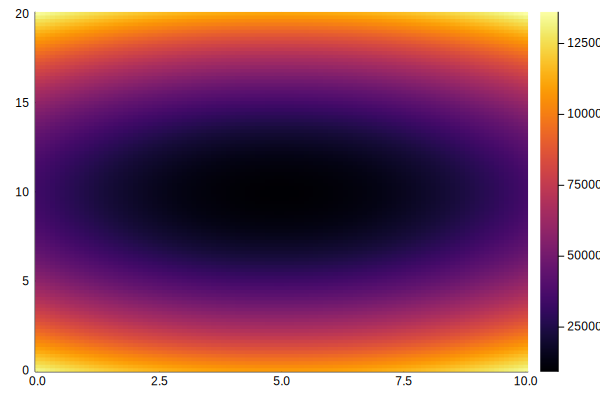

In [9]:
# Plot of error function
# contourf(xgrid,ygrid,zgrid')
heatmap(xgrid,ygrid,zgrid')

In [8]:
out = optimize(loss_function,[2.0,3.0])

 * Status: success

 * Candidate solution
    Minimizer: [4.94e+00, 9.93e+00]
    Minimum:   9.203199e+03

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [2.00e+00, 3.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    44
    f(x) calls:    89


## Regularized Loss Function

In [10]:
reg_loss(beta; lambda=0) = sum(((x .- beta[1]).^2 + (y .- beta[2]).^2)) + lambda * sum(beta.^2)

reg_loss (generic function with 1 method)

In [11]:
out = optimize(reg_loss,[2.0,3.0])

 * Status: success

 * Candidate solution
    Minimizer: [4.94e+00, 9.93e+00]
    Minimum:   9.203199e+03

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [2.00e+00, 3.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    44
    f(x) calls:    89


### Making the L-Curve

In [15]:
l_vec = vcat(0,exp.(0:0.5:20.0))

42-element Array{Float64,1}:
   0.0                 
   1.0                 
   1.6487212707001282  
   2.718281828459045   
   4.4816890703380645  
   7.38905609893065    
  12.182493960703473   
  20.085536923187668   
  33.11545195869231    
  54.598150033144236   
  90.01713130052181    
 148.4131591025766     
 244.69193226422038    
   ⋮                   
   1.9827592635375687e6
   3.2690173724721107e6
   5.389698476283012e6 
   8.886110520507872e6 
   1.4650719428953517e7
   2.41549527535753e7  
   3.982478439757623e7 
   6.565996913733051e7 
   1.0825498775023076e8
   1.7848230096318728e8
   2.942675660415088e8 
   4.851651954097903e8 

In [22]:
L = length(l_vec)
model_error = zeros(L)
parameter_size = zeros(L)
for i = 1:L
    out = optimize(x->reg_loss(x;lambda=l_vec[i]),[2.0,3.0])
    parameter_size[i] = sum(out.minimizer.^2)
    model_error[i] = reg_loss(out.minimizer; lambda=l_vec[i]) - parameter_size[i]
end

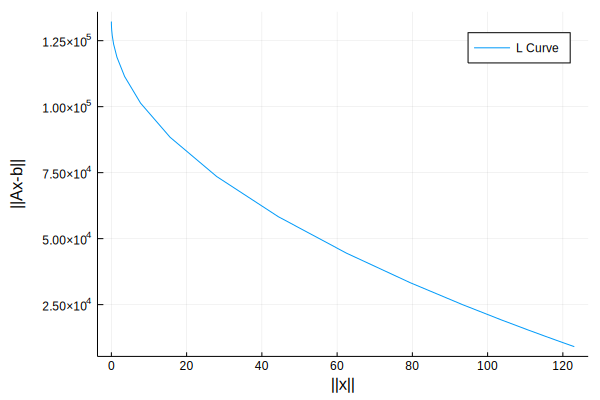

In [17]:
plot(parameter_size,model_error,label="L Curve",xlabel="||x||", ylabel="||Ax-b||")

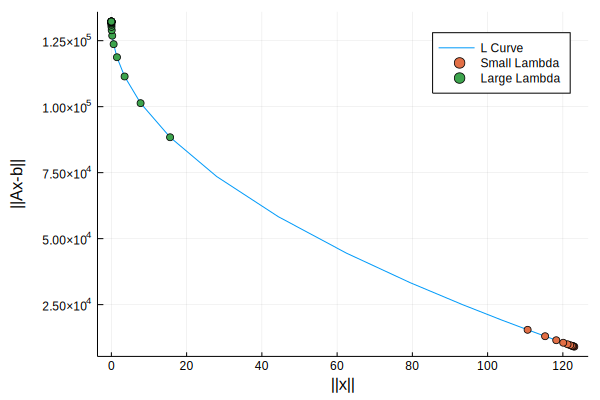

In [18]:
scatter!(parameter_size[1:10],model_error[1:10],label="Small Lambda")
scatter!(parameter_size[(end-25):end],model_error[(end-25):end],label="Large Lambda")

### Visualizing Different Metrics

In [23]:
out_orig = optimize(x->reg_loss(x;lambda=0),[2.0,3.0]);

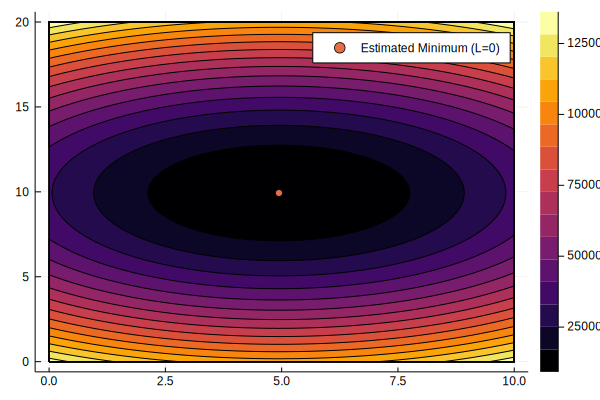

In [24]:
# Plot of error function with Minimum
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")

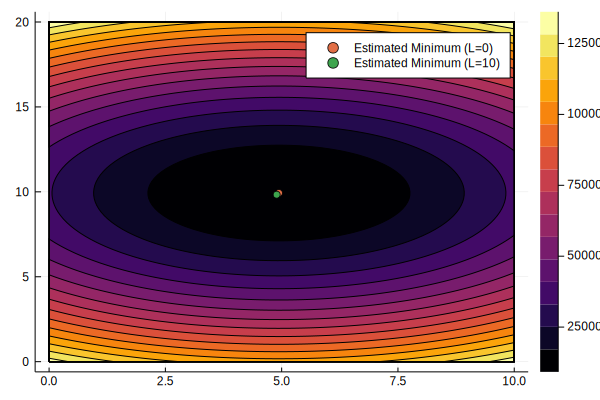

In [25]:
lam = 10
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")

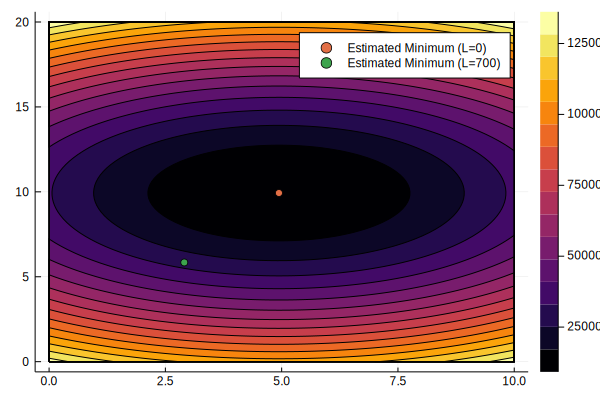

In [26]:
lam = 700
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")

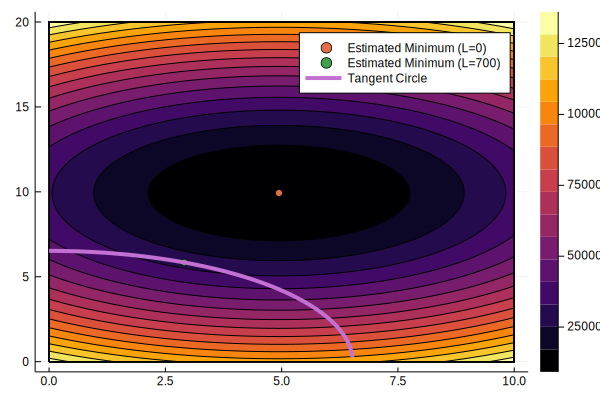

In [27]:
lam = 700
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")
d = sqrt(sum(out.minimizer.^2))
xs = 0:0.01:d; ys = sqrt.(d^2 .- xs.^2)
plot!(xs,ys,linewidth=4,label="Tangent Circle")

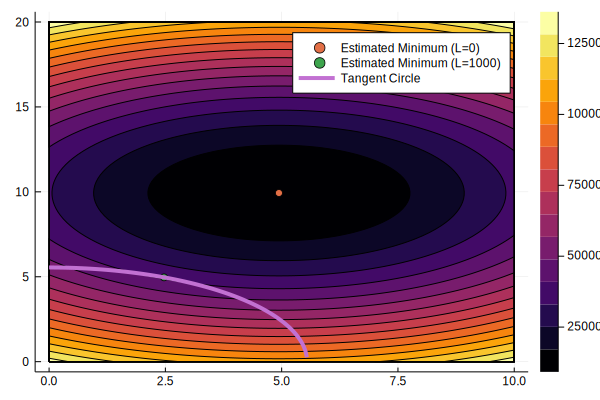

In [28]:
lam = 1000
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")
d = sqrt(sum(out.minimizer.^2))
xs = 0:0.01:d; ys = sqrt.(d^2 .- xs.^2)
plot!(xs,ys,linewidth=4,label="Tangent Circle")

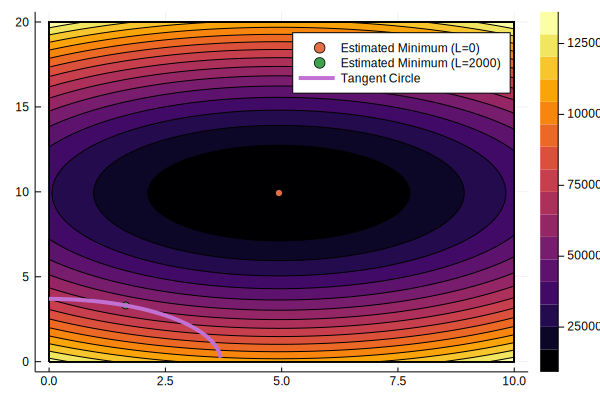

In [29]:
lam = 2000
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")
d = sqrt(sum(out.minimizer.^2))
xs = 0:0.01:d; ys = sqrt.(d^2 .- xs.^2)
plot!(xs,ys,linewidth=4,label="Tangent Circle")

#### Absolute Value Penalty Term

In [30]:
reg_loss(beta; lambda=0) = sum(((x .- beta[1]).^2 + (y .- beta[2]).^2)) + lambda * sum(abs.(beta));

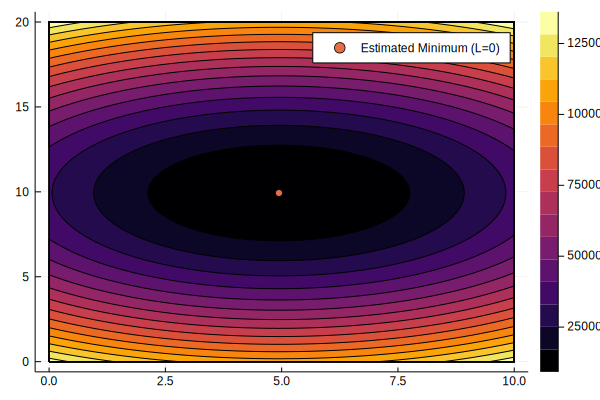

In [31]:
# Plot of error function with Minimum
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")

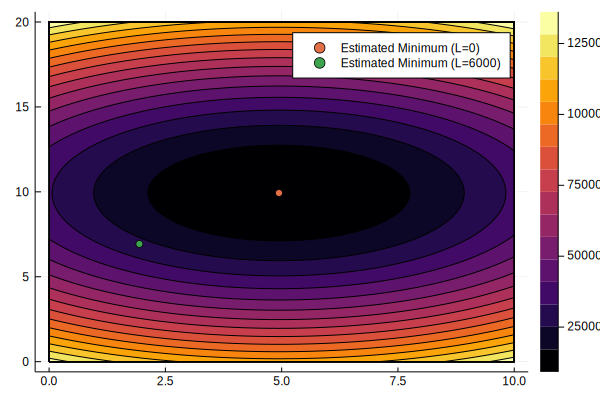

In [32]:
lam = 6000
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")

In [34]:
lam = 6000
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")
d = sum(abs.(out.minimizer))
# xs = 0:0.01:10; ys = (d .- xs) .* (d .- xs .> 0)
xs = 0:0.01:d; ys = (d .- xs) .* (d .- xs .> 0)
plot!(xs,ys,linewidth=4,label="Tangent Circle")

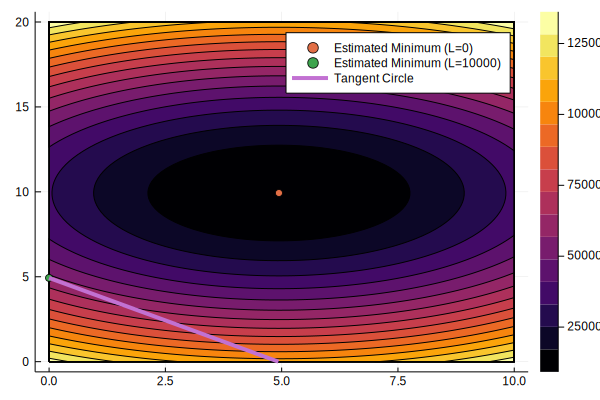

In [35]:
lam = 10000
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")
d = sum(abs.(out.minimizer))
# xs = 0:0.01:10; ys = (d .- xs) .* (d .- xs .> 0)
xs = 0:0.01:d; ys = (d .- xs) .* (d .- xs .> 0)
plot!(xs,ys,linewidth=4,label="Tangent Circle")

#### Max Value Penalty Term

In [36]:
reg_loss(beta; lambda=0) = sum(((x .- beta[1]).^2 + (y .- beta[2]).^2)) + lambda * maximum(abs.(beta));

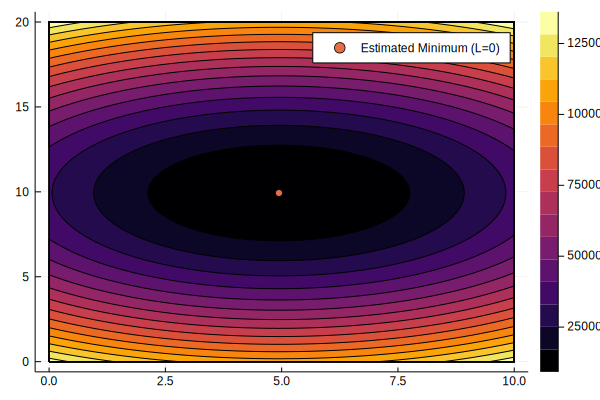

In [37]:
# Plot of error function with Minimum
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")

In [38]:
lam = 6000
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")

In [39]:
lam = 6000
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")
d = maximum(abs.(out.minimizer))
xs = 0:0.01:d; ys = vcat( d .* ones(length(xs)-1), 0)
plot!(xs,ys,linewidth=4,label="Tangent Circle")

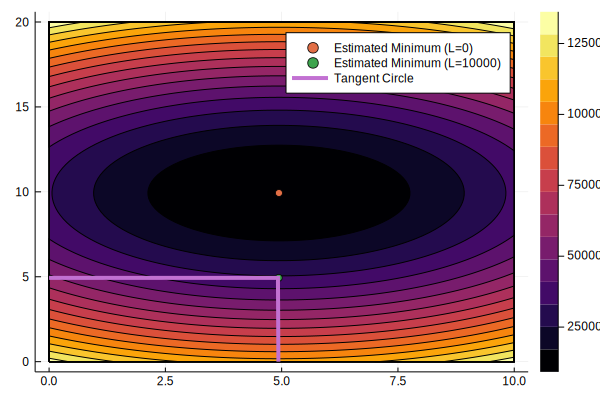

In [40]:
lam = 10000
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")
d = maximum(abs.(out.minimizer))
xs = 0:0.01:d; ys = vcat( d .* ones(length(xs)-1), 0)
plot!(xs,ys,linewidth=4,label="Tangent Circle")

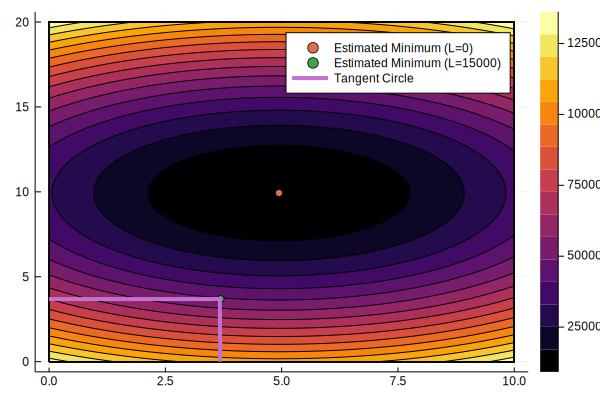

In [41]:
lam = 15000
out = optimize(x->reg_loss(x;lambda=lam),[2.0,3.0]);
contourf(xgrid,ygrid,zgrid')
scatter!([out_orig.minimizer[1]],[out_orig.minimizer[2]],label="Estimated Minimum (L=0)")
scatter!([out.minimizer[1]],[out.minimizer[2]],label="Estimated Minimum (L=$lam)")
d = maximum(abs.(out.minimizer))
xs = 0:0.01:d; ys = vcat( d .* ones(length(xs)-1), 0)
plot!(xs,ys,linewidth=4,label="Tangent Circle")